<a href="https://colab.research.google.com/github/zw2497/Neural_Network_PDE/blob/master/ODE2_mid_Activation_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ODE2_mid Activation comparision

In this section, we will compare different activation functions. 

We compare X activation functions: 

1. tanh
2. softmax
3. elu
4. selu
5. softplus
6. relu
7. sigmoid
8. hard_sigmoid

In [0]:
# !pip -q install tf-nightly-2.0-preview

In [1]:
import tensorflow as tf 
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.math import sin
import time
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.nn import relu

print("You have version", tf.__version__)
assert tf.__version__ >= "2.0" # TensorFlow ≥ 2.0 required

nx = 100
x_space = np.linspace(-1, 1, nx).astype('float32').reshape(nx,1)
x_space = tf.constant(x_space)

batch_size = 16
dataset = tf.data.Dataset.from_tensor_slices(x_space).batch(batch_size, drop_remainder=True)
example_batch = next(iter(dataset))
source = example_batch
print("Shapes:", source.shape)

def f(x):
    return sin(x) + 4 * sin(4*x) - 8 * sin(8*x) + 16 * sin(24*x)

def psy_trial(x, net_out):
    return (-1. - x) * (1. - x) * net_out
  
def NN(activation_function):
    model = Sequential()
    model.add(Dense(128, input_shape=(None, 1), activation=activation_function))
    model.add(Dense(64, activation=activation_function))
    model.add(Dense(32, activation=activation_function))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(0.0005)
    return model, optimizer
  
def loss_function(y_true, y_pred):
    return keras.losses.mean_squared_error(y_true, y_pred)
  
@tf.function
def train_on_batch(x):
    
    with tf.GradientTape() as g_total:
        with tf.GradientTape() as g:
            g.watch(x)
            with tf.GradientTape() as gg:
                gg.watch(x)
                net_out = model(x)
                psy_t = psy_trial(x, net_out)

            dy_dx = gg.gradient(psy_t, x)     # gradient
        d2y_dx2 = g.gradient(dy_dx, x)  # second order gradient
        
        func = f(x) # right part function
        loss = loss_function(-d2y_dx2, func)
#         print(d2y_dx2)

    grads = g_total.gradient(loss, model.variables)
    optimizer.apply_gradients(zip(grads, model.variables))
    return tf.math.reduce_sum(loss)
  
def plot_figure(function_name):
  plt.figure()
  res = psy_trial(x_space, model(x_space)).numpy().reshape(nx)
  x_space
  plt.plot(x_space, res)
  plt.title("Neural network solution with {} activation function".format(function_name))
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

You have version 2.0.0-alpha0
Shapes: (16, 1)


Epoch #0, Loss 1645.391846, Time 0.00 sec
Epoch #100, Loss 1569.013428, Time 0.01 sec
Epoch #200, Loss 1511.688721, Time 0.01 sec
Epoch #300, Loss 1495.944458, Time 0.01 sec
Epoch #400, Loss 1533.399414, Time 0.01 sec
Epoch #500, Loss 1183.146729, Time 0.01 sec
Epoch #600, Loss 947.342407, Time 0.01 sec
Epoch #700, Loss 578.503601, Time 0.01 sec
Epoch #800, Loss 498.180023, Time 0.01 sec
Epoch #900, Loss 446.771240, Time 0.01 sec


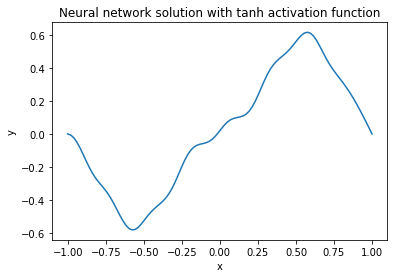

In [4]:
# 1
model, optimizer = NN('tanh')
for epoch in range(1000):
          for batch, source_data in enumerate(dataset):
              start = time.time()
              loss = train_on_batch(source_data)
          if epoch % 100 == 0:
              print("Epoch #%d, Loss %.6f, Time %.2f sec" % (epoch, loss, time.time() - start))
plot_figure('tanh')

Epoch #0, Loss 1706.700317, Time 0.01 sec
Epoch #100, Loss 1691.686279, Time 0.01 sec
Epoch #200, Loss 1680.452759, Time 0.01 sec
Epoch #300, Loss 1671.870850, Time 0.01 sec
Epoch #400, Loss 1664.623047, Time 0.01 sec
Epoch #500, Loss 1656.689209, Time 0.01 sec
Epoch #600, Loss 1645.090332, Time 0.01 sec
Epoch #700, Loss 1621.040649, Time 0.01 sec
Epoch #800, Loss 1564.739990, Time 0.01 sec
Epoch #900, Loss 1496.778931, Time 0.01 sec


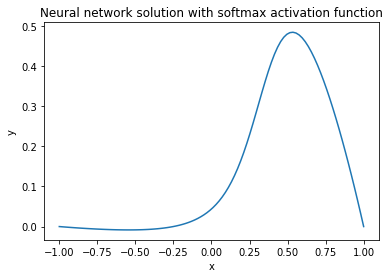

In [4]:
# 2
model, optimizer = NN('softmax')
for epoch in range(1000):
          for batch, source_data in enumerate(dataset):
              start = time.time()
              loss = train_on_batch(source_data)
          if epoch % 100 == 0:
              print("Epoch #%d, Loss %.6f, Time %.2f sec" % (epoch, loss, time.time() - start))
plot_figure('softmax')

Epoch #0, Loss 1747.468994, Time 0.00 sec
Epoch #100, Loss 1676.772827, Time 0.01 sec
Epoch #200, Loss 1753.433594, Time 0.00 sec
Epoch #300, Loss 1581.304932, Time 0.00 sec
Epoch #400, Loss 1538.935059, Time 0.01 sec
Epoch #500, Loss 1967.964600, Time 0.01 sec
Epoch #600, Loss 5627739.000000, Time 0.01 sec
Epoch #700, Loss 481452.125000, Time 0.01 sec
Epoch #800, Loss 1140097.875000, Time 0.01 sec
Epoch #900, Loss 1242875.500000, Time 0.00 sec


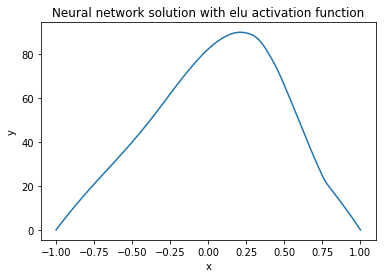

In [2]:
# 3
model, optimizer = NN('elu')
for epoch in range(1000):
          for batch, source_data in enumerate(dataset):
              start = time.time()
              loss = train_on_batch(source_data)
          if epoch % 100 == 0:
              print("Epoch #%d, Loss %.6f, Time %.2f sec" % (epoch, loss, time.time() - start))
plot_figure('elu')

Epoch #0, Loss 1674.008911, Time 0.00 sec
Epoch #100, Loss 1511.863770, Time 0.01 sec
Epoch #200, Loss 171026.750000, Time 0.02 sec
Epoch #300, Loss 210452.843750, Time 0.01 sec
Epoch #400, Loss 2912843.750000, Time 0.02 sec
Epoch #500, Loss 1518373.000000, Time 0.01 sec
Epoch #600, Loss 18426.287109, Time 0.01 sec
Epoch #700, Loss 48789.734375, Time 0.01 sec
Epoch #800, Loss 59309.632812, Time 0.01 sec
Epoch #900, Loss 106314.070312, Time 0.01 sec


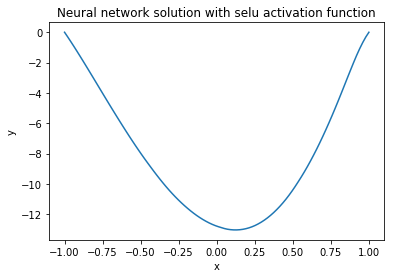

In [2]:
# 4
model, optimizer = NN('selu')
for epoch in range(1000):
          for batch, source_data in enumerate(dataset):
              start = time.time()
              loss = train_on_batch(source_data)
          if epoch % 100 == 0:
              print("Epoch #%d, Loss %.6f, Time %.2f sec" % (epoch, loss, time.time() - start))
plot_figure('selu')

Epoch #0, Loss 1781.546265, Time 0.00 sec
Epoch #100, Loss 1605.709961, Time 0.01 sec
Epoch #200, Loss 1627.744873, Time 0.01 sec
Epoch #300, Loss 1691.150146, Time 0.01 sec
Epoch #400, Loss 1801.237793, Time 0.01 sec
Epoch #500, Loss 1638.150269, Time 0.01 sec
Epoch #600, Loss 1625.216675, Time 0.01 sec
Epoch #700, Loss 1460.277466, Time 0.01 sec
Epoch #800, Loss 1144.406250, Time 0.01 sec
Epoch #900, Loss 747.811890, Time 0.01 sec


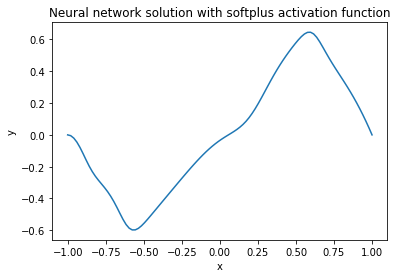

In [2]:
# 5
model, optimizer = NN('softplus')
for epoch in range(1000):
          for batch, source_data in enumerate(dataset):
              start = time.time()
              loss = train_on_batch(source_data)
          if epoch % 100 == 0:
              print("Epoch #%d, Loss %.6f, Time %.2f sec" % (epoch, loss, time.time() - start))
plot_figure('softplus')

Epoch #0, Loss 1695.790405, Time 0.00 sec
Epoch #100, Loss 1699.390137, Time 0.00 sec
Epoch #200, Loss 1681.839355, Time 0.01 sec
Epoch #300, Loss 1377.438599, Time 0.00 sec
Epoch #400, Loss 1085.833984, Time 0.00 sec
Epoch #500, Loss 968.030640, Time 0.00 sec
Epoch #600, Loss 792.070251, Time 0.00 sec
Epoch #700, Loss 757.504150, Time 0.00 sec
Epoch #800, Loss 934.794861, Time 0.00 sec
Epoch #900, Loss 716.248779, Time 0.00 sec


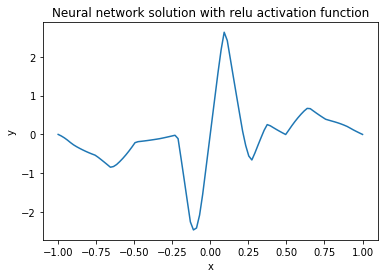

In [2]:
# 6
model, optimizer = NN('relu')
for epoch in range(1000):
          for batch, source_data in enumerate(dataset):
              start = time.time()
              loss = train_on_batch(source_data)
          if epoch % 100 == 0:
              print("Epoch #%d, Loss %.6f, Time %.2f sec" % (epoch, loss, time.time() - start))
plot_figure('relu')

Epoch #0, Loss 1761.753418, Time 0.00 sec
Epoch #100, Loss 1632.630127, Time 0.01 sec
Epoch #200, Loss 1610.076416, Time 0.00 sec
Epoch #300, Loss 1598.942627, Time 0.00 sec
Epoch #400, Loss 1611.090210, Time 0.01 sec
Epoch #500, Loss 1636.343018, Time 0.01 sec
Epoch #600, Loss 1670.255249, Time 0.01 sec
Epoch #700, Loss 1695.063477, Time 0.01 sec
Epoch #800, Loss 1683.249023, Time 0.01 sec
Epoch #900, Loss 1649.362061, Time 0.01 sec


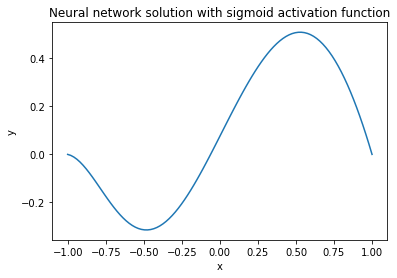

In [2]:
# 7 
model, optimizer = NN('sigmoid')
for epoch in range(1000):
          for batch, source_data in enumerate(dataset):
              start = time.time()
              loss = train_on_batch(source_data)
          if epoch % 100 == 0:
              print("Epoch #%d, Loss %.6f, Time %.2f sec" % (epoch, loss, time.time() - start))
plot_figure('sigmoid')

Epoch #0, Loss 1718.756348, Time 0.00 sec
Epoch #100, Loss 1637.992676, Time 0.01 sec
Epoch #200, Loss 1623.386353, Time 0.01 sec
Epoch #300, Loss 1603.087158, Time 0.01 sec
Epoch #400, Loss 1599.908203, Time 0.01 sec
Epoch #500, Loss 1602.248291, Time 0.01 sec
Epoch #600, Loss 1606.067261, Time 0.01 sec
Epoch #700, Loss 1603.994141, Time 0.01 sec
Epoch #800, Loss 1605.119995, Time 0.01 sec
Epoch #900, Loss 1605.782837, Time 0.01 sec


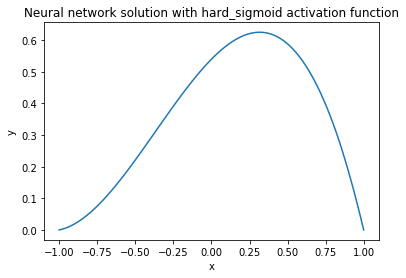

In [2]:
# 8 
model, optimizer = NN('hard_sigmoid')
for epoch in range(1000):
          for batch, source_data in enumerate(dataset):
              start = time.time()
              loss = train_on_batch(source_data)
          if epoch % 100 == 0:
              print("Epoch #%d, Loss %.6f, Time %.2f sec" % (epoch, loss, time.time() - start))
plot_figure('hard_sigmoid')

In [0]:
# #tooooooooo slow
# class MyClass:
#     def __init__(self, activation_function):
#       self.activation_function = activation_function

      
#     def f(self, x):
#         return sin(x) + 4 * sin(4*x) - 8 * sin(8*x) + 16 * sin(24*x)

#     def psy_trial(self, x, net_out):
#         return (-1. - x) * (1. - x) * net_out

#     def NN(self, activation_function):
#         model = Sequential()
#         model.add(Dense(128, input_shape=(None, 1), activation=self.activation_function))
#         model.add(Dense(64, activation=self.activation_function))
#         model.add(Dense(32, activation=self.activation_function))
#         model.add(Dense(1))
#         optimizer = tf.keras.optimizers.Adam(0.0005)
#         return model, optimizer

#     def loss_function(self, y_true, y_pred):
#         return keras.losses.mean_squared_error(y_true, y_pred)

#     #@tf.function
#     def train_on_batch(self, x):
#         model, optimizer = self.NN(self.activation_function)
#         with tf.GradientTape() as g_total:
#             with tf.GradientTape() as g:
#                 g.watch(x)
#                 with tf.GradientTape() as gg:
#                     gg.watch(x)
#                     net_out = model(x)
#                     psy_t = self.psy_trial(x, net_out)

#                 dy_dx = gg.gradient(psy_t, x)     # gradient
#             d2y_dx2 = g.gradient(dy_dx, x)  # second order gradient

#             func = self.f(x) # right part function
#             loss = self.loss_function(-d2y_dx2, func)
#     #         print(d2y_dx2)

#         grads = g_total.gradient(loss, model.variables)
#         optimizer.apply_gradients(zip(grads, model.variables))
#         return tf.math.reduce_sum(loss)

#     def train(self):
#       for epoch in range(1000):
#           for batch, source_data in enumerate(dataset):
#               start = time.time()
#               loss = self.train_on_batch(source_data)
#           if epoch % 100 == 0:
#               print("Epoch #%d, Loss %.6f, Time %.2f sec" % (epoch, loss, time.time() - start))
              
#       plt.figure()
#       res = psy_trial(x_space, model(x_space)).numpy().reshape(nx)
#       x_space
#       plt.plot(x_space, res)
#       plt.show()

#       # every 100 times frequency     
    

In [0]:
# x = MyClass('tanh')
# x.train()

In [0]:
# from scipy.fftpack import fft, fftfreq, fftshift
# import scipy

# from scipy.fftpack import fft
# # # Number of sample points
# N = 100
# # sample spacing
# T = 1.0 / 500.0
# # x = np.linspace(0.0, N*T, N)
# # y = np.sin(x) + 4*np.sin(4*x) -8*np.sin(8*x) + 16*np.sin(24*x)
# yf = fft(res)
# xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
# import matplotlib.pyplot as plt
# plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
# plt.grid()
# plt.xlim(0,15)
# plt.show()